### Simulation of a single-stranded chiral molecule with Coulomb interactions in a 'Hubbard-I' approximation
(MEP J.M. Heinisch, 2022)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Functions concerning the Helix' geometry and indices
These are necessary for computing the coefficients $\lambda_k$ of the SOI. Note that there is only made limited use of these functions in the following code, since only a single-stranded helical molecule is simulated in this code, while these functions have been created to compute geometrical properties and indexing of a helicene (containing an inner, outer and middle helix) molecule.

In [2]:
def Angle_mult_site(Ind_arr):
    """
    Gives the angles of the indices
    Input:
        Ind_arr : Indices, where Ind_arr[0] stores the hexagons' indices, while Ind_arr[1] stores the atoms' indices
        Beyond the 1st argument/index, Ind_arr can have any shape
    Returns:
        Phi_tot : Array storing the angles of the atoms in Ind_arr. phi_tot has the same shape as Ind[0] and Ind[1]. 
        Indices in phi_tot[:,...] correspond to indices in Ind[0,:,..]
    """
    Ind_Hex = Ind_arr[0]
    Ind_Atom = Ind_arr[1]
    del_phis = np.array([0,0,Phi2,Phi1-Phi2])
    phi_tot = Ind_Hex*Phi1 + del_phis[Ind_Atom]
    return phi_tot

def Spiral_mult_map(Ind_arr):
    """
    Gives the spiral/helix on which the atoms of Ind_arr lie
    Input:
        Ind_arr : Indices, where Ind_arr[0] stores the hexagons' indices, while Ind_arr[1] stores the atoms' indices
        Beyond the 1st argument/index, Ind_arr can have any shape
    Returns:
        Spiral_arr : Helix on which the atoms are on. 0 corresponds to the inner helix, 1 <=> middle helix, 2 <=> outer helix
        Spiral_arr has the same shape as Ind_arr, while Spiral_arr[i,j,...] gives the helix on which the atom corresponding 
        to Ind_arr[i,j,...] lies on
    """
    Ind_Atom = Ind_arr[1]
    Atom_map = np.array([0,1,2,2])
    Spiral_arr = Atom_map[Ind_Atom]
    return Spiral_arr

def Atom_mult_pos(Ind_arr, pitch):
    """
    Gives the positions of atoms whose indices are stored in Ind_arr
    Input:
        Ind_arr : Indices, where Ind_arr[0] stores the hexagons' indices, while Ind_arr[1] stores the atoms' indices
        Beyond the 1st argument/index, Ind_arr can have any shape
    Returns:
        Pos : Storing the positions of the atoms. Pos[0], Pos[1], Pos[2] give the x,y,z-coordinates (respectively)
        of all the atoms in Ind_arr. Pos[x_i,i,j,...] gives the i-th coordinate of the atom corresponding to 
        Ind_arr[i,j,...]
    """
    Ind_Hex = Ind_arr[0]
    Ind_Atom = Ind_arr[1]
    Angles = Angle_mult_site(Ind_arr)
    Spiral_indices = Spiral_mult_map(Ind_arr)
    Radius_dict = np.array([R_I,R_M,R_A])
    Radius_vals = Radius_dict[Spiral_indices]
    Pos = np.array([Radius_vals*np.cos(Angles), Radius_vals*np.sin(Angles), pitch/(2*np.pi)*Angles])
    return Pos

def Atom_site_vecs(Ind_arr):
    """
    Gives the set of base/normal-vectors at sites stored in Ind_arr
    Input:
        Ind_arr : Indices, where Ind_arr[0] stores the hexagons' indices, while Ind_arr[1] stores the atoms' indices
        Beyond the 1st argument/index, Ind_arr can have any shape
    Returns:
        base_vecs : where base_vecs[i,j,k,...] gives the j-th coordinate of the i-th normal/base-vector of the site
        corresponding to the site of indices [k,...] in the Ind_arr
    """
    Ind_Hex = Ind_arr[0]
    Ind_Atom = Ind_arr[1]
    Angles = Angle_mult_site(Ind_arr)
    nx = np.array([np.cos(Angles), np.sin(Angles),np.zeros([len(Angles)])])
    ny = np.array([-np.sin(Angles), np.cos(Angles),np.zeros([len(Angles)])])
    nz = np.array([np.zeros([len(Angles)]), np.zeros([len(Angles)]), np.ones([len(Angles)])])
    base_vecs = np.array([nx,ny,nz])
    return base_vecs

def index_convert(N_hex):
    """
    Generates integers for indices in a multi-stranded helix
    Input:
        N_hex : Number of hexagons of which the helix is constructed
    Returns:
        ivals1_res : i_vals2_res[i,j] gives the converted index corresponding to the j-th atom in the i-th hexagon
    """
    i_vals1 = np.linspace(0,N_hex*4-1,N_hex*4)
    i_vals1_res = np.reshape(i_vals1, [N_hex,4])
    return i_vals1_res.astype(int)

def rev_index_convert(N_hex):
    """ 
    Input:
        N_hex : Number of hexagons of which the helix is constructed
    Returns:
        Ind_arr : Ind_arr[:,i] gives the original indices (hexagon-index & atom-index) of the converted index i
    """
    Ind = np.linspace(0,4*N_hex-1,4*N_hex).astype(int)
    ind1 = np.floor(Ind/4)
    ind2 = Ind - ind1*4
    Ind_arr = np.array([ind1,ind2])
    return Ind_arr.astype(int)



def generate_connections(N_hex):
    """
    Generates links between atoms for overlapping electrons
    Input:
        N_hex : Number of hexagons of which the helix is constructed
    Returns:
        Conns_tot : Conns_tot[:,i] gives the (converted) indices of the i-th link
    """
    Indices_arr = index_convert(N_hex)
    Conns_01 = np.array([Indices_arr[:,0], Indices_arr[:,1]])
    Conns_12 = np.array([Indices_arr[:,1], Indices_arr[:,2]])
    Conns_23 = np.array([Indices_arr[:,2], Indices_arr[:,3]])
    Conns_inter_31 = np.array([Indices_arr[:-1,3], Indices_arr[1:,1]])
    Conns_inter_00 = np.array([Indices_arr[:-1,0], Indices_arr[1:,0]])

    Conns_tot = np.copy(Conns_01)
    Conns_tot = np.append(Conns_tot, Conns_12, axis = 1)
    Conns_tot = np.append(Conns_tot, Conns_23, axis = 1)
    Conns_tot = np.append(Conns_tot, Conns_inter_31, axis = 1)
    Conns_tot = np.append(Conns_tot, Conns_inter_00, axis = 1)
    return Conns_tot.astype(int)



#### Geometrical parameters of the helices
These are the radii of the inner-middle and outer helices and the angles. The angles are $\Phi_1$, which is the angle which one hexagon occupies, while $\Phi_2$ is the angle between two neigboring sites on the middle and outer helices. This corresponds to the angle Phi_1 in Geyer's "Chirality-Induced Spin Selectivity in a Coarse-Grained Tight-Binding Model for Helicene" (J. Phys. Chem. 2019 123 27230-27241) in figure 1.

In [3]:
#Inner, middle and outer radii
R_I = 1.4
R_M = 2
R_A = np.sqrt(7)

#Angles
Phi1 = 60*np.pi/180 #Angle which one hexagon occupies
Phi2 = 19.1*np.pi/180 #Angle between two neigboring sites on the middle and outer helices, this corresponds to the angle Phi_1 in Geyer's "Chirality-Induced Spin Selectivity in a Coarse-Grained Tight-Binding Model for Helicene" (J. Phys. Chem. 2019 123 27230-27241) in figure 1.
pitch_hel = 1

Computing the $\lambda_k$ of the site-pairs in which SOI occurs

In [4]:
N_t = 14 #Number of hexagons
I_C = index_convert(N_t)
revI_C = rev_index_convert(N_t)

Conn_H = generate_connections(N_t)
revI_C[:,Conn_H][:,0,0]
Pos_A = Atom_mult_pos(revI_C, pitch_hel)

Pos_A_org = Pos_A[:,I_C]

DiffPos = np.diff(Pos_A_org[:,:,0], axis = 1) #Taking the differences of the positions of the inner helix' sites
DiffPos_len = np.sqrt(np.sum(DiffPos**2, axis=0))
DiffPos_norm = DiffPos/DiffPos_len
Cross_diff = np.cross(DiffPos_norm[:,1:], np.array([1,0,1]), axisa = 0, axisb = 0)
#np.cross(DiffPos_norm[:,1:], DiffPos_norm[:,:-1], axisa = 0, axisb = 0)


Functions for conveniently generating NN and NNN links for a single standed molecule

In [6]:
def link_generator(N):
    """
    Generates nearest-neighbor links for a single-stranded molecule
    Input:
        N : Number of sites in the molecule
    Returns:
        link_arr : list storing unique NN links, where link_arr[i] gives a tuple of the two sites of which the i-th link consists
    """
    link_arr = []
    for i in range(0,N-1):
        link_arr.append((i,i+1))
    return link_arr


def SOI_link_generator(N):
    """
    Generates next nearest-neighbor links for a single-stranded molecule
    Input:
        N : Number of sites in the molecule
    Returns:
        link_arr : list storing unique NNN links, where link_arr[i] gives a tuple of the two sites of which the i-th link consists
    """
    link_arr = []
    for i in range(0,N-2):
        link_arr.append((i,i+2))
    return link_arr


#### Matrices which are present in the 'Hubbard-I' retarded GF
The matrices which do not depend on the sites' occupations (given in the file uploaded to surfdrive "Equations of motions GF with SOI 2 PDF") are computed in this section

In [7]:
N_sites = 8
E_site = np.zeros([N_sites, 2, N_sites, 2], dtype = 'complex128')
E_vals = np.array([0]*N_sites)

Tau_links = link_generator(N_sites)
Tau_vals = 4*np.ones([len(Tau_links)], dtype = 'complex128')
Tau_arr = np.zeros([N_sites, 2, N_sites, 2], dtype = 'complex128')

for i in range(0,N_sites):
    E_site[i,[0,1],i,[0,1]] = E_vals[i]

"""
Tunnel-couplings
"""

for i in range(0,len(Tau_links)):
    Tau_i = Tau_vals[i] #+ np.random.random(size = 1)
    Tau_arr[Tau_links[i][0],[0,1],Tau_links[i][1],[0,1]] = Tau_i
    Tau_arr[Tau_links[i][1],[0,1],Tau_links[i][0],[0,1]] = np.conj(Tau_i)


"""
Spin-Orbit Interaction
"""
Pauli_vec = np.zeros([2,2,3], dtype = 'complex128')
Pauli_vec[:,:,0] = np.array([[0,1],[1,0]])
Pauli_vec[:,:,1] = np.array([[0,-1j],[1j,0]])
Pauli_vec[:,:,2] = np.array([[1,0],[0,-1]])


SOI_links = link_generator(N_sites)
SOI_arr = np.zeros([N_sites,2,N_sites,2], dtype = 'complex128')
SOI_vecs = 0.5*Cross_diff[:N_sites]# [0.2*np.array([1,1,1])]*len(SOI_links)

for i in range(0,len(SOI_links)):
    SOI_sum = np.sum(Pauli_vec*SOI_vecs[i], axis = 2)
    SOI_arr[SOI_links[i][0],:,SOI_links[i][1],:] = 1j*SOI_sum
    SOI_arr[SOI_links[i][1],:,SOI_links[i][0],:] = np.conj(np.transpose(1j*SOI_sum))
#plt.imshow(np.real(SOI_arr_res));plt.colorbar();plt.show()
#plt.imshow(np.imag(SOI_arr_res));plt.colorbar()
"""
Occupation numbers
"""

def get_n_arr_res(Occ):
    """
    Returns a diagonal array storing the occupation-numbers 
    Input:
        Occ : (shape = [N_sites, 2, N_sites, 2]) Array where Occ[i,s,i',s'] gives the value of <c^+_is c_i's'>
    Returns:
        n_arr_res : (shape = [2*N_sites, 2*N_sites]) Array where n_arr[2*i,2*i], n_arr[2*i+1,2*i+1] give the occupations of the up-spin and down-spins respectively: (n_{isi's'} = \delta_{is,i's'}<n_{i-s}>)
    """
    print(Occ.shape)
    Occ_diag = Occ[np.arange(0,N_sites),:,np.arange(0,N_sites),:]
    Occ_down = Occ_diag[:,0,0]; Occ_up = Occ_diag[:,1,1]
    
    n_arr = np.zeros([N_sites,2,N_sites,2], dtype = 'complex128')
    n_arr[np.arange(0,N_sites),0,np.arange(0,N_sites),0] = Occ_up
    n_arr[np.arange(0,N_sites),1,np.arange(0,N_sites),1] = Occ_down
    
    n_arr_res = np.reshape(n_arr, newshape = [2*N_sites, 2*N_sites])
    return n_arr_res

def get_UC_arr_res(Occ):
    """
    Returns the array containing 'Hartree-Fock' off-site capacitive interactions
    Input:
        Occ : (shape = [N_sites, 2, N_sites, 2]) Array where Occ[i,s,i',s'] gives the value of <c^+_is c_i's'>
    Returns:
        UC_arr_res: (shape = [2*Nsites, 2*Nsites]) Array containing the 'HF' offsite capacitive interations, where UC_arr_res(isi's') = delta_is,i's' Sum_{is =\= i''s''} U_is,i''s'' <n_{i''s''}>
    """
    n_arr_2 = np.reshape(Occ, [N_sites*2,N_sites*2])[np.arange(0,N_sites*2), np.arange(0,N_sites*2)]
    UC_arr_res = np.diag(np.dot(UC_tot_arr_res, n_arr_2))
    return UC_arr_res


Occ_arr0_res = np.diag(0.5*np.ones([2*N_sites], dtype = 'complex128'))
Occ_arr0 = np.reshape(Occ_arr0_res, [N_sites,2,N_sites,2])
n_arr0 = get_n_arr_res(Occ_arr0)

"""
Capacitive interactions
"""
U_onsite_vals = np.array([4.]*N_sites)

UC_links = link_generator(N_sites)
UC_vals = np.array([0.]*len(UC_links))

U_Diag_tot_arr = np.zeros([N_sites, 2, N_sites, 2], dtype = 'complex128')
UC_tot_arr = np.zeros([N_sites, 2, N_sites, 2], dtype = 'complex128')

for i in range(0,N_sites):
    U_Diag_tot_arr[i,[0,1],i,[1,0]] = U_onsite_vals[i] #Since U_is,is = 0, representing the unphysical self-interactions. U_is,i-s =/= 0
    
for i in range(0,len(UC_links)):
    UC_tot_arr[UC_links[i][0],:,UC_links[i][1],:] = UC_vals[i]
    UC_tot_arr[UC_links[i][1],:,UC_links[i][0],:] = np.conj(UC_vals[i])

UC_tot_arr_res = np.reshape(UC_tot_arr, newshape = [2*N_sites, 2*N_sites]) #Reshaping for matrix-multiplication with n

U_onsite_arr = np.zeros([N_sites, 2, N_sites, 2], dtype = 'complex128')
for i in range(0,N_sites):
    U_onsite_arr[i,[0,1],i,[0,1]] = U_Diag_tot_arr[i,[0,1],i,[1,0]]


Id_res = np.eye(N_sites*2,N_sites*2,k=0,dtype = 'complex128')
Id = np.reshape(Id_res, newshape = [N_sites, 2, N_sites, 2])

E_site_res = np.reshape(E_site, newshape = [2*N_sites, 2*N_sites])
U_onsite_arr_res = np.reshape(U_onsite_arr, newshape = [2*N_sites, 2*N_sites])
Tau_arr_res = np.reshape(Tau_arr, newshape = [2*N_sites, 2*N_sites])
SOI_arr_res = np.reshape(SOI_arr, newshape = [2*N_sites, 2*N_sites])

(8, 2, 8, 2)


#### Self-energies of the leads
The left and right lead's self energies $\Sigma_{L,R} = -\frac{i}{2}\Gamma_{L,R}$ are computed in the wide-band limit (energy-independent, diagonal and purely-imaginary self-energies). If $\Gamma_{i\uparrow} > \Gamma_{i\downarrow}$ for one of the leads, this lead is interpreted to be up-polarized (and vice-versa).

In [13]:
Lead_connect_L = [0,1]
Lead_connect_R = [6,7]


#Gamma is indepdendent of energy as the wide-band limit is considered

#Defining spin-projection matrices for computation of spin-dependent transmission (T_uu, T_ud, ...)
Spin_proj_down = np.zeros([N_sites,2,N_sites,2], dtype = 'complex128')
Spin_proj_up = np.zeros([N_sites,2,N_sites,2], dtype = 'complex128')

Spin_proj_down[:,0,:,0] = np.eye(N_sites,N_sites, k=0)
Spin_proj_up[:,1,:,1] = np.eye(N_sites,N_sites, k=0)

Spin_res_down = np.reshape(Spin_proj_down, newshape = [2*N_sites,2*N_sites])
Spin_res_up = np.reshape(Spin_proj_up, newshape = [2*N_sites,2*N_sites])


Gamma_L0_down = 0.075
Gamma_L0_up = 0.025


Gamma_L_down = np.zeros([N_sites,N_sites], dtype = 'complex128')
Gamma_L_up = np.zeros([N_sites,N_sites], dtype = 'complex128')

for i in range(0,len(Lead_connect_L)): #Assuming Gamma's are equal for all connections between lead and molecule
    Gamma_L_down[Lead_connect_L[i],Lead_connect_L[i]] = Gamma_L0_down
    Gamma_L_up[Lead_connect_L[i],Lead_connect_L[i]] = Gamma_L0_up


Gamma_L_tot = np.zeros([N_sites,2,N_sites,2], dtype = 'complex128')
Gamma_L_tot[:,0,:,0] = Gamma_L_down; Gamma_L_tot[:,1,:,1] = Gamma_L_up
Gamma_L_res = np.reshape(Gamma_L_tot, newshape = [2*N_sites,2*N_sites])

Gamma_R0_down = 0.5
Gamma_R0_up = 0.5

Gamma_R_down = np.zeros([N_sites,N_sites], dtype = 'complex128')
Gamma_R_up = np.zeros([N_sites,N_sites], dtype = 'complex128')

for i in range(0,len(Lead_connect_R)):
    Gamma_R_down[Lead_connect_R[i],Lead_connect_R[i]] = Gamma_R0_down
    Gamma_R_up[Lead_connect_R[i],Lead_connect_R[i]] = Gamma_R0_up

Gamma_R_tot = np.zeros([N_sites,2,N_sites,2], dtype = 'complex128')
Gamma_R_tot[:,0,:,0] = Gamma_R_down; Gamma_R_tot[:,1,:,1] = Gamma_R_up
Gamma_R_res = np.reshape(Gamma_R_tot, newshape = [2*N_sites,2*N_sites])

Sigma_L = -1j/2*Gamma_L_tot
Sigma_R = -1j/2*Gamma_R_tot

Sigma_L_res = np.reshape(Sigma_L,  newshape = [2*N_sites,2*N_sites])
Sigma_R_res = np.reshape(Sigma_R,  newshape = [2*N_sites,2*N_sites])

Sigma_tot_res = Sigma_L_res + Sigma_R_res


#### Functions for self-consistently determining the molecule's sites occupations

In [14]:
def generate_GF_ret_res(E, n_arr_res, UC_arr_res):#, E_site_res=E_site_res, Tau_arr_res=Tau_arr_res, SOI_arr_res=SOI_arr_res, Sigma_tot_res=Sigma_tot_res, U_onsite_arr_res=U_onsite_arr_res, UC_arr_res=UC_arr_res, Id_res = Id_res):
    """
    Computes the retarded GF in the 'Hubbard-I'-approximation for a given <n_-sigma> and off-site capacitive array
    Input:
        E : Energy
        n_arr_res : (shape = [2*Nsites, 2*Nsites]) Array containing the occupation-numbers, where n_arr_res(isi's') = delta_is,i's' <n_{-is}>
        UC_arr_res: (shape = [2*Nsites, 2*Nsites]) Array containing the 'HF' offsite capacitive interations, where UC_arr_res(isi's') = delta_is,i's' Sum_{is =\= i''s''} U_is,i''s'' <n_{i''s''}>
    Returns:
        G_ret_res : (shape = [2*Nsites, 2*Nsites]) Array containing the retarded GF for energy E. 
    """
    #print(n_a)
    G_num = E*Id_res - E_site_res - Sigma_tot_res - np.dot(U_onsite_arr_res,Id_res - n_arr_res)
    G_den = np.dot(E*Id_res - E_site_res - Sigma_tot_res - U_onsite_arr_res, E*Id_res - E_site_res - Sigma_tot_res - UC_arr_res - Tau_arr_res - SOI_arr_res) - np.dot(U_onsite_arr_res, np.dot(n_arr_res, Tau_arr_res + SOI_arr_res))
    
    G_ret_res = np.dot(np.linalg.inv(G_den), G_num)
    return G_ret_res


def FD_dist(E, mu, beta=1):
    return 1/(np.exp((E - mu)*beta) + 1)

def get_GF_E_res(e_arr, mu_L, mu_R, n_arr_res, UC_arr_res, beta=1):
    """
    Computes the retarded and lesser GFs for all energies in e_arr
    The system is coupled to left & right leads kept at chemical potentials mu_L and mu_R, respectively, and at temperature beta
    Arrays n_arr_res and UC_arr_res are the occupation-arrays and non-site Capacitive interaction arrays (both diagonal)
    
    Input:
        e_arr : 1D array containing all energy-values (e_arr[i] gives the i-th energy-value)
        mu_L, mu_R : Left and right lead's chemical potential
        n_arr_res : (shape = [2*Nsites, 2*Nsites]) Array containing the occupation-numbers, where n_arr_res(isi's') = delta_is,i's' <n_{-is}>
        UC_arr_res: (shape = [2*Nsites, 2*Nsites]) Array containing the 'HF' offsite capacitive interations, where UC_arr_res(isi's') = delta_is,i's' Sum_{is =\= i''s''}(U_is,i''s'' <n_{i''s''}>)
        beta : Inverse temperature
    Returns:
        G_ret_store : (shape = [len(e_arr), Nsites, 2, Nsites, 2]) Array containing all retarded GF at energies in e_arr, where G_ret_store[i] gives the retarded GF at energy e_arr[i]
        G_less_store : (shape = [len(e_arr), Nsites, 2, Nsites, 2]) Array containing all lesser GF at energies in e_arr, where G_ret_store[i] gives the lesser GF at energy e_arr[i]
    """
    G_less_store = np.zeros([len(e_arr)] + [N_sites,2,N_sites,2],dtype = 'complex128')
    G_ret_store = np.zeros([len(e_arr)] + [N_sites,2,N_sites,2],dtype = 'complex128')
    
    for i in range(0,len(e_arr)):
        E = e_arr[i]
        
        Sigma_less_res = 1j*(Gamma_L_res*FD_dist(E,mu_L,beta) + Gamma_R_res*FD_dist(E,mu_R,beta))
        
        G_ret_res = generate_GF_ret_res(E, n_arr_res, UC_arr_res)#, E_site_res, Tau_arr_res, SOI_arr_res, Sigma_tot_res, U_onsite_arr_res, UC_arr_res, Id_res = Id_res)
        G_ret = np.reshape(G_ret_res, newshape = [N_sites, 2, N_sites, 2])
        
        G_adv_res = np.conj(np.transpose(G_ret_res))
        G_less_res = np.dot(G_ret_res, np.dot(Sigma_less_res, G_adv_res)) #Keldysh equation
        G_less = np.reshape(G_less_res, newshape = [N_sites, 2, N_sites, 2])
        
        G_ret_store[i] = G_ret
        G_less_store[i] = G_less
    return G_ret_store, G_less_store

def get_occup(G_less_store, e_arr):
    """
    Computes the occupations of the molecule's sites from the lesser GFs in G_less_store, where the energy of 
    G_less_store[i] corresponds to the energiy given by e_arr[i]
    
    Input:
        G_ret_store : (shape = [len(e_arr), Nsites, 2, Nsites, 2]) Array containing all retarded GF at energies in e_arr, where G_ret_store[i] gives the retarded GF at energy e_arr[i]
        e_arr : 1D array containing all energy-values (e_arr[i] gives the i-th energy-value)
    Returns:
        Occ_arr : (shape = [len(e_arr, 2*Nsites, 2*Nsites)]) Array containing all values of <c^+_is c_i's'>, where Occ_arr[i] gives the values corresponding to energy e_arr[i]. Occupations <n_is> are found on the diagonal of Occ_arr[i,:,:]
    """
    delta_E = np.abs(e_arr[1] - e_arr[0])
    Occ_arr = np.zeros([N_sites, 2, N_sites, 2], dtype = 'complex128')
    
    Occ_arr = 1/(2*np.pi)*delta_E*np.sum(-1j*G_less_store, axis = 0)

    return Occ_arr


def get_Occ_SC(Occ, e_arr, mu_L, mu_R, beta = 1):
    """
    Input:
        Occ : (shape = [N_sites,2,N_sites,2]) Initial guess of occupations, where Occ[i,s,i',s'] = <c^+_is c_i's'>
    Returns:
        Occ_arr : (shape = [N_sites,2,N_sites,2]) Array containing occupations obtained from the lesser GF, where Occ[i,s,i',s'] = <c^+_is c_i's'>
    """

    n_arr_res = get_n_arr_res(Occ)
    print(n_arr_res[np.arange(0,2*N_sites), np.arange(0,2*N_sites)])
    UC_arr_res = get_UC_arr_res(Occ)
    
    G_ret_store, G_less_store = get_GF_E_res(e_arr, mu_L, mu_R, n_arr_res, UC_arr_res, beta = beta)
    Occ_arr = get_occup(G_less_store, e_arr)
    
    print(Occ_arr[np.arange(0,N_sites),0,np.arange(0,N_sites),0])    
    return (1*Occ_arr + 0.*Occ)

def get_Occ_conv(Occ0, e_arr, mu_L, mu_R, n_iter, beta = 1):
    """
    Self-consistently finds the occupations of the molecule's sites from an initial guess of occupations
    Input:
        Occ0 : (shape = [N_sites,2,N_sites,2]) Initial guess of occupations, where Occ[i,s,i',s'] = <c^+_is c_i's'>
        e_arr : 1D array containing all energy-values (e_arr[i] gives the i-th energy-value)
        mu_L, mu_R : Chemical potentials of the left and right leads, respectively
        n_iter : Number of iterations of the self-consistent loop
        beta : Inverse temperature
    Returns:
        Occ_i : (shape = [N_sites,2,N_sites,2]) Self-consistently obtained array containing occupations where Occ[i,s,i',s'] = <c^+_is c_i's'>
    """
    for j in range(0,n_iter):
        if j==0:
            Occ_i = get_Occ_SC(Occ0, e_arr, mu_L, mu_R, beta = beta)
        if j!=0:
            Occ_i = get_Occ_SC(Occ_i, e_arr, mu_L, mu_R, beta = beta)
    return Occ_i


def Occ_V_sweep(mu0, V_arr, e_arr, n_it0, n_it, beta = 1):
    """
    Finds the molecule's sites occupations for a molecule coupled to leads held at zero-bias chemical potential mu0 and bias-voltages stored in V_arr
    
    The occupations are guessed before the self-consistent loop of the first voltage value, after which the self-consistently 
    obtained occupations are used as initial guess for subsequent voltages. Therefore, the number of iterations of the first loop
    can be chosen separately than that of the following loops since the first loop may take longer to converge because of 
    the effects of the initial guess.
    Input:
        mu0 : Chemical potential of the leads in case of no bias-voltage
        V_arr : 1D Array containing all bias-voltages such that for the i-th vaulue, the leads are kept at mu_L = mu0 + V_arr[i]/2 and mu_R = mu0 - V_arr[i]/2
        e_arr : 1D array containing all energy-values (e_arr[i] gives the i-th energy-value)
        iter_init : Number of iteration steps of the first loop. 
        iter_loop : Number of iteration steps of the subsequent loops
        beta : Inverse temperature
    Returns:
        Occ_store : (shape = [len(V_arr),N_sites,2,N_sites,2]) Array containg the occupations at the bias-voltages stored in V_arr, where Occ[Vi,i,s,i',s'] = <c^+_is c_i's'> at bias-voltage Vi
    """
    Occ_store = np.zeros([len(V_arr), N_sites, 2, N_sites, 2], dtype = 'complex128')
    for k in range(0,len(V_arr)):
        mu_L = mu0 + V_arr[k]/2; mu_R = mu0 - V_arr[k]/2
        if k==0:
            n_iter = n_it0
            Occ_arr0_res = np.diag(0.5*np.ones([2*N_sites], dtype = 'complex128'))
            Occ_arr0 = np.reshape(Occ_arr0_res, [N_sites,2,N_sites,2])
        if k!=0:
            n_iter = n_it
            Occ_arr0 = Occ_i
        
        Occ_i = get_Occ_conv(Occ_arr0, e_arr, mu_L, mu_R, n_iter, beta = beta)
        Occ_store[k] = Occ_i
    return Occ_store
            

#### Determining the molecule's occupations self-consistently over a voltage range

(8, 2, 8, 2)
[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j
 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
[0.38423618+6.29765694e-19j 0.38641184+1.12907062e-18j
 0.41369298-3.42102160e-19j 0.39858995-3.06625522e-19j
 0.40112732+2.09148543e-19j 0.41179491+1.72828242e-19j
 0.3860827 -6.67941509e-19j 0.37920835-2.60081318e-19j]
(8, 2, 8, 2)
[0.41603147+6.13278755e-19j 0.38423618+6.29765694e-19j
 0.40920497-1.51317934e-19j 0.38641184+1.12907062e-18j
 0.43470282+8.87853027e-19j 0.41369298-3.42102160e-19j
 0.41716669-1.11472093e-19j 0.39858995-3.06625522e-19j
 0.41947363-3.38569003e-19j 0.40112732+2.09148543e-19j
 0.43267759-1.73208803e-19j 0.41179491+1.72828242e-19j
 0.40856463-1.77579154e-19j 0.3860827 -6.67941509e-19j
 0.40757637+4.52693990e-19j 0.37920835-2.60081318e-19j]
[0.41220964-4.99164977e-20j 0.40931566+2.11051850e-19j
 0.43114887-3.54792660e-19j 0.42004781-2.36912885e-19j
 0.42120891-6.83152495e-19j 0.43090947-3.08589349e-19j
 0.40890215-1.04

[0.40105713-2.53072236e-19j 0.40318935+1.43778057e-19j
 0.4251787 -1.35117930e-19j 0.41327259+3.38949008e-20j
 0.41528012+5.88897967e-19j 0.42449596-5.42143536e-19j
 0.40286059+2.32898052e-19j 0.39675973-4.67525408e-19j]
(8, 2, 8, 2)
[0.44950044-2.33144972e-20j 0.40105713-2.53072236e-19j
 0.43237975+2.19917683e-19j 0.40318935+1.43778057e-19j
 0.4541375 -1.98661897e-19j 0.4251787 -1.35117930e-19j
 0.44068117-7.31215544e-19j 0.41327259+3.38949008e-20j
 0.4411911 -4.58183375e-19j 0.41528012+5.88897967e-19j
 0.45295564-6.34911845e-19j 0.42449596-5.42143536e-19j
 0.4313839 -6.16896626e-19j 0.40286059+2.32898052e-19j
 0.44156442+4.25777870e-19j 0.39675973-4.67525408e-19j]
[0.40105719-6.57909710e-21j 0.40318935+1.87225402e-19j
 0.42517872-9.96665281e-19j 0.41327261+4.45247207e-21j
 0.41528013-2.21276249e-20j 0.42449599+4.22920853e-19j
 0.40286059+2.18524541e-19j 0.39675978-1.02900083e-19j]
(8, 2, 8, 2)
[0.44950052-1.06763176e-19j 0.40105719-6.57909710e-21j
 0.43237976-3.27985417e-19j 0.403189

[0.38624201+2.13622265e-19j 0.40649969-1.17279801e-19j
 0.41739024-3.73135426e-19j 0.40687526+1.37716381e-18j
 0.40889374+6.75747510e-19j 0.41680086-5.20525118e-19j
 0.40601893+7.07752816e-19j 0.38257804-2.79291513e-19j]
(8, 2, 8, 2)
[0.43271832-8.55263518e-19j 0.38624201+2.13622265e-19j
 0.42927666+9.96223941e-19j 0.40649969-1.17279801e-19j
 0.44259461+5.77518059e-19j 0.41739024-3.73135426e-19j
 0.43207065-7.34871754e-19j 0.40687526+1.37716381e-18j
 0.43318145-1.40304098e-19j 0.40889374+6.75747510e-19j
 0.44126369+2.67214577e-19j 0.41680086-5.20525118e-19j
 0.4277653 -7.15750979e-19j 0.40601893+7.07752816e-19j
 0.42561181+1.97156269e-19j 0.38257804-2.79291513e-19j]
[0.38616811-3.58874010e-19j 0.40650017-4.04268879e-19j
 0.41735293+1.80689008e-19j 0.40685336-1.11219096e-19j
 0.40887452-1.39380046e-18j 0.41676217+5.40341052e-19j
 0.40601645-4.12425135e-19j 0.38251235-7.13657741e-19j]
(8, 2, 8, 2)
[0.43263637+8.26683314e-20j 0.38616811-3.58874010e-19j
 0.42927653+2.95098939e-19j 0.406500

[0.38619012+1.97069621e-19j 0.40650036-6.64084518e-19j
 0.41736425-2.48778308e-19j 0.40686011-9.54344151e-19j
 0.40888036+8.43979562e-19j 0.41677384-1.86442111e-19j
 0.40601747-2.68110888e-19j 0.38253226+4.22841911e-19j]
(8, 2, 8, 2)
[0.43265784+5.62623065e-20j 0.38619012+1.97069621e-19j
 0.42927626-1.02171473e-18j 0.40650036-6.64084518e-19j
 0.44256367+5.88341731e-19j 0.41736425-2.48778308e-19j
 0.432052  -7.56107046e-19j 0.40686011-9.54344151e-19j
 0.43316513-3.12908636e-19j 0.40888036+8.43979562e-19j
 0.44123179+8.96591513e-19j 0.41677384-1.86442111e-19j
 0.42776289-3.58181190e-20j 0.40601747-2.68110888e-19j
 0.42555683-8.95484724e-20j 0.38253226+4.22841911e-19j]
[0.38619012+3.76481286e-19j 0.40650036-6.33266465e-19j
 0.41736425-1.17516696e-19j 0.40686011+7.25953405e-21j
 0.40888036-7.29034114e-19j 0.41677384+1.08904050e-19j
 0.40601747-2.34563838e-20j 0.38253226+1.33089100e-19j]
(8, 2, 8, 2)
[0.43265784-5.32874449e-19j 0.38619012+3.76481286e-19j
 0.42927626-3.49187337e-19j 0.406500

[0.37603967+5.04149982e-19j 0.40854617+2.93481458e-19j
 0.4103858 +3.68472152e-19j 0.40356499+4.73701642e-19j
 0.40413589+5.42385815e-20j 0.4104084 -1.05101642e-19j
 0.40758688-2.99243614e-19j 0.37274839+2.18805036e-19j]
(8, 2, 8, 2)
[0.41998821+7.77322500e-20j 0.37603967+5.04149982e-19j
 0.42731959-2.57718587e-19j 0.40854617+2.93481458e-19j
 0.43278085-2.59597993e-20j 0.4103858 +3.68472152e-19j
 0.42641361-3.55740308e-19j 0.40356499+4.73701642e-19j
 0.42688035-6.52887135e-20j 0.40413589+5.42385815e-20j
 0.43208648-3.18189908e-20j 0.4104084 -1.05101642e-19j
 0.42486538+5.66083896e-19j 0.40758688-2.99243614e-19j
 0.41332972+4.17787894e-19j 0.37274839+2.18805036e-19j]
[0.37603909+1.83633529e-19j 0.40854618+7.32985905e-19j
 0.4103855 +1.29788894e-18j 0.40356483+9.92696430e-19j
 0.40413572-4.54057197e-19j 0.41040811+2.01441073e-19j
 0.40758686+3.18313763e-19j 0.37274787+1.64912462e-19j]
(8, 2, 8, 2)
[0.41998755+3.50759460e-19j 0.37603909+1.83633529e-19j
 0.4273196 -3.61448504e-19j 0.408546

[0.37192462+4.33120563e-19j 0.41089818-4.63369511e-19j
 0.40571906+2.33085578e-19j 0.40371252+9.62847507e-19j
 0.403078  +2.40732973e-19j 0.40613444+6.25586921e-19j
 0.4096368 +1.23409023e-19j 0.3689134 -4.06344261e-19j]
(8, 2, 8, 2)
[0.41253567-6.64836360e-20j 0.37192462+4.33120563e-19j
 0.42614499+1.82585078e-19j 0.41089818-4.63369511e-19j
 0.42662075+9.61678014e-19j 0.40571906+2.33085578e-19j
 0.4233485 -9.70869612e-19j 0.40371252+9.62847507e-19j
 0.4232446 -6.75155042e-19j 0.403078  +2.40732973e-19j
 0.42639733-7.45465612e-19j 0.40613444+6.25586921e-19j
 0.42302287-4.37723403e-19j 0.4096368 +1.23409023e-19j
 0.40621973-9.71152773e-19j 0.3689134 -4.06344261e-19j]
[0.37211142+3.43819693e-19j 0.41089718+2.82837216e-19j
 0.40581766+3.19033415e-19j 0.40376484-9.75049827e-19j
 0.4031338 +4.93217745e-19j 0.4062253 -5.38959810e-20j
 0.40964662-7.21022323e-20j 0.36908403+3.09196237e-19j]
(8, 2, 8, 2)
[0.41269919+2.16966519e-19j 0.37211142+3.43819693e-19j
 0.42614034+7.14027296e-19j 0.410897

[0.37207134-1.33141580e-19j 0.41089856+1.10314859e-19j
 0.40579757+1.50956221e-19j 0.40375495+4.82744085e-19j
 0.40312228+1.33347165e-18j 0.40620631-6.17331578e-19j
 0.40964524-2.12305537e-19j 0.36905022+2.05809876e-19j]
(8, 2, 8, 2)
[0.41262813-3.75585944e-19j 0.37207134-1.33141580e-19j
 0.42614053+3.50392522e-19j 0.41089856+1.10314859e-19j
 0.42666803-1.30492784e-18j 0.40579757+1.50956221e-19j
 0.42336952+6.72644436e-19j 0.40375495+4.82744085e-19j
 0.4232699 +1.16307247e-18j 0.40312228+1.33347165e-18j
 0.42644178-8.49777100e-19j 0.40620631-6.17331578e-19j
 0.42302444-7.31092842e-19j 0.40964524-2.12305537e-19j
 0.40629726+1.86814495e-20j 0.36905022+2.05809876e-19j]
[0.37207133-6.01358920e-19j 0.41089856-5.52049045e-20j
 0.40579756+4.20844303e-20j 0.40375495+1.81600664e-20j
 0.40312228+8.05474986e-19j 0.4062063 -1.06927536e-18j
 0.40964524-7.71652113e-19j 0.36905021-4.69298883e-19j]
(8, 2, 8, 2)
[0.41262812-1.40709975e-20j 0.37207133-6.01358920e-19j
 0.42614053+1.87271973e-19j 0.410898

[0.37290136-1.45705245e-19j 0.41441537+3.02692965e-19j
 0.4034691 -3.31331983e-19j 0.4062143 -1.37189034e-19j
 0.40535155-2.66906919e-19j 0.40369254+3.32514205e-19j
 0.41306391-2.69199637e-19j 0.37009504+2.69806219e-19j]
(8, 2, 8, 2)
[0.40824093-2.26335139e-19j 0.37290136-1.45705245e-19j
 0.42514495+1.03863536e-18j 0.41441537+3.02692965e-19j
 0.42287128+4.56734307e-20j 0.4034691 -3.31331983e-19j
 0.42143704-1.97801805e-19j 0.4062143 -1.37189034e-19j
 0.42128562-3.17811303e-19j 0.40535155-2.66906919e-19j
 0.42269166-7.26171248e-20j 0.40369254+3.32514205e-19j
 0.42188743+1.37309454e-19j 0.41306391-2.69199637e-19j
 0.40217372-3.34204690e-19j 0.37009504+2.69806219e-19j]
[0.3729026 +9.30874169e-21j 0.41441537-6.11136198e-19j
 0.40346976-7.72628950e-19j 0.40621466+5.03587157e-19j
 0.40535192-1.09879391e-18j 0.40369314+1.45507895e-18j
 0.41306398-2.30406427e-19j 0.3700962 +1.59937919e-20j]
(8, 2, 8, 2)
[0.40824138+2.07855784e-19j 0.3729026 +9.30874169e-21j
 0.42514493+1.23917730e-19j 0.414415

[0.37499643+1.32348563e-19j 0.41714949-1.74942129e-19j
 0.4027464 -6.28154224e-19j 0.40831488+9.21761964e-19j
 0.40782283+3.25529317e-19j 0.4025616 +5.54866385e-19j
 0.41560458+4.20202704e-19j 0.37227555-6.23951930e-20j]
(8, 2, 8, 2)
[0.4054056 -3.29891857e-19j 0.37499643+1.32348563e-19j
 0.42404978+4.35175036e-19j 0.41714949-1.74942129e-19j
 0.42054482-4.07379385e-19j 0.4027464 -6.28154224e-19j
 0.41994009-2.92577869e-19j 0.40831488+9.21761964e-19j
 0.41989368+4.32512652e-19j 0.40782283+3.25529317e-19j
 0.42028536-8.43509550e-19j 0.4025616 +5.54866385e-19j
 0.4208667 +4.66283560e-19j 0.41560458+4.20202704e-19j
 0.39949597-5.55037990e-19j 0.37227555-6.23951930e-20j]
[0.37503903-3.25732398e-19j 0.41716314+3.58588806e-19j
 0.40277008-1.61146831e-19j 0.40833836+4.38413935e-19j
 0.40784674+6.14468907e-20j 0.40257914-4.08261795e-19j
 0.41561904-4.36542857e-19j 0.37232523+6.21181229e-19j]
(8, 2, 8, 2)
[0.40530042-6.59623619e-21j 0.37503903-3.25732398e-19j
 0.42405117-2.91133352e-19j 0.417163

[0.37511702-1.17827217e-19j 0.41716369+3.71324526e-19j
 0.402814  +4.19034246e-19j 0.40836138-8.88589919e-19j
 0.40786909+2.92065702e-20j 0.40261793+9.09868327e-19j
 0.41562283+1.08385884e-18j 0.37240322-3.43709917e-19j]
(8, 2, 8, 2)
[0.40523906+5.78572747e-19j 0.37511702-1.17827217e-19j
 0.42404732+4.60406834e-19j 0.41716369+3.71324526e-19j
 0.42044951+5.10384752e-19j 0.402814  +4.19034246e-19j
 0.41989012-8.49581635e-19j 0.40836138-8.88589919e-19j
 0.41984565+6.07542520e-19j 0.40786909+2.92065702e-20j
 0.42019994-4.29191471e-19j 0.40261793+9.09868327e-19j
 0.42085768+3.33657844e-19j 0.41562283+1.08385884e-18j
 0.39932973+1.87613655e-20j 0.37240322-3.43709917e-19j]
[0.37511703-2.60179164e-20j 0.41716369+2.96806149e-19j
 0.402814  -7.79230526e-20j 0.40836138-4.80368267e-19j
 0.4078691 -6.41018647e-19j 0.40261793-2.88363462e-19j
 0.41562283-2.09884932e-19j 0.37240323-1.01695251e-19j]
(8, 2, 8, 2)
[0.40523906+3.93565405e-21j 0.37511703-2.60179164e-20j
 0.42404732-2.10365428e-19j 0.417163

[0.37628325-3.97905127e-19j 0.41778121-3.15171285e-19j
 0.40286845+4.91812356e-19j 0.40877299-1.65214106e-19j
 0.40882765+2.36952364e-19j 0.40214153-4.62188955e-19j
 0.4161485 -4.05234897e-19j 0.37362493+1.62724245e-19j]
(8, 2, 8, 2)
[0.40169513+3.24768636e-19j 0.37628325-3.97905127e-19j
 0.42240164+5.12552962e-19j 0.41778121-3.15171285e-19j
 0.41819538+7.36891944e-19j 0.40286845+4.91812356e-19j
 0.41784745-4.74752131e-19j 0.40877299-1.65214106e-19j
 0.41796017-9.99237565e-21j 0.40882765+2.36952364e-19j
 0.41776181-1.08729135e-19j 0.40214153-4.62188955e-19j
 0.41942508+4.86192145e-19j 0.4161485 -4.05234897e-19j
 0.396071  +1.78471495e-19j 0.37362493+1.62724245e-19j]
[0.37628276-2.04567053e-19j 0.41778124-2.30477540e-19j
 0.40286822-5.21132928e-19j 0.40877288-3.57023402e-19j
 0.40882751+3.79464559e-20j 0.40214129+9.35411020e-20j
 0.41614849+2.22832352e-19j 0.37362456+6.34609755e-19j]
(8, 2, 8, 2)
[0.40169322-4.04132626e-19j 0.37628276-2.04567053e-19j
 0.42240169+6.79290524e-19j 0.417781

[0.37559209+1.34619379e-19j 0.41677922-4.27630729e-19j
 0.40255724-2.90446588e-19j 0.40750507+5.27380654e-19j
 0.40823211-1.27780962e-18j 0.4012091 -1.85395693e-19j
 0.41517947-1.22427414e-19j 0.37309129+8.80454362e-20j]
(8, 2, 8, 2)
[0.39503888+7.02818307e-20j 0.37559209+1.34619379e-19j
 0.4199811 +3.64247391e-19j 0.41677922-4.27630729e-19j
 0.41428573+4.75502314e-19j 0.40255724-2.90446588e-19j
 0.41424119-8.78084350e-19j 0.40750507+5.27380654e-19j
 0.41472842+2.27164676e-19j 0.40823211-1.27780962e-18j
 0.41345049-1.03241256e-19j 0.4012091 -1.85395693e-19j
 0.41723712+3.03460937e-19j 0.41517947-1.22427414e-19j
 0.39014409+4.70461744e-19j 0.37309129+8.80454362e-20j]
[0.37618461+1.16306442e-19j 0.41678955-1.26552270e-19j
 0.40288539+1.05421850e-18j 0.40768409-4.18048669e-19j
 0.40841286-6.26460178e-19j 0.40151983-5.04918013e-19j
 0.41521558+1.81998694e-19j 0.37365099+1.78971589e-19j]
(8, 2, 8, 2)
[0.39534094+6.49635841e-19j 0.37618461+1.16306442e-19j
 0.41998951-2.96508779e-20j 0.416789

[0.37616536+1.35847264e-19j 0.41678817-1.00760785e-19j
 0.40288059+8.31953632e-19j 0.40767718-5.51435127e-20j
 0.40840599+5.69367371e-19j 0.40150726-2.28688565e-19j
 0.41521354+2.61814970e-19j 0.3736429 -2.10243629e-19j]
(8, 2, 8, 2)
[0.39507532-4.29803560e-19j 0.37616536+1.35847264e-19j
 0.41999137+4.61284116e-19j 0.41678817-1.00760785e-19j
 0.41429277+2.60754414e-19j 0.40288059+8.31953632e-19j
 0.41426292+7.97815363e-19j 0.40767718-5.51435127e-20j
 0.41474416-3.62541621e-19j 0.40840599+5.69367371e-19j
 0.41348024+3.19133499e-19j 0.40150726-2.28688565e-19j
 0.41724669+3.38635194e-19j 0.41521354+2.61814970e-19j
 0.39015922+1.74965931e-19j 0.3736429 -2.10243629e-19j]
[0.37616535-1.88647690e-19j 0.41678817-3.34855696e-19j
 0.40288059+7.27259127e-19j 0.40767718+2.14260816e-20j
 0.40840598+1.73016255e-19j 0.40150725+2.24049779e-19j
 0.41521354+2.97020962e-19j 0.37364289+4.55211954e-19j]
(8, 2, 8, 2)
[0.3950753 +3.12949095e-19j 0.37616535-1.88647690e-19j
 0.41999137+1.35995885e-19j 0.416788

[0.37375253+2.31454532e-19j 0.41546266+6.31129475e-19j
 0.40099674+3.02366120e-19j 0.40547751+1.52746354e-19j
 0.40661829+3.60150386e-19j 0.39943035+7.49265932e-19j
 0.4134757 -1.04605614e-18j 0.37131444-4.61928564e-19j]
(8, 2, 8, 2)
[0.38418505-2.69520509e-19j 0.37375253+2.31454532e-19j
 0.41755233-2.31986749e-19j 0.41546266+6.31129475e-19j
 0.4070406 +7.76456487e-19j 0.40099674+3.02366120e-19j
 0.40910484+5.25331981e-21j 0.40547751+1.52746354e-19j
 0.40988824+9.03665685e-20j 0.40661829+3.60150386e-19j
 0.40606167+3.99220941e-19j 0.39943035+7.49265932e-19j
 0.41448799-9.76619788e-19j 0.4134757 -1.04605614e-18j
 0.38016555+1.11244877e-19j 0.37131444-4.61928564e-19j]
[0.37375663-9.90434088e-19j 0.41546249+2.95824329e-19j
 0.40099895+8.74882733e-20j 0.40547849-5.54526848e-19j
 0.40661943+6.83626003e-19j 0.39943233+1.36185717e-18j
 0.41347576+1.16290276e-19j 0.37131825-2.59979401e-19j]
(8, 2, 8, 2)
[0.38418773+1.47286127e-19j 0.37375663-9.90434088e-19j
 0.41755221-1.21204989e-18j 0.415462

[0.36881481-6.19320367e-20j 0.41447758+2.14005496e-19j
 0.39625676+1.20532746e-18j 0.40289398-2.21519314e-19j
 0.40325917+1.01578380e-19j 0.39569819-1.84631742e-19j
 0.41112865-4.08168185e-19j 0.36609891-2.08689770e-20j]
(8, 2, 8, 2)
[0.37312538-4.69710020e-19j 0.36881481-6.19320367e-20j
 0.41566297+4.48405845e-19j 0.41447758+2.14005496e-19j
 0.39844208-8.38819797e-19j 0.39625676+1.20532746e-18j
 0.40429205-1.68356950e-19j 0.40289398-2.21519314e-19j
 0.40441559+4.60299169e-19j 0.40325917+1.01578380e-19j
 0.39815586+2.65841074e-19j 0.39569819-1.84631742e-19j
 0.41145281+5.83517996e-19j 0.41112865-4.08168185e-19j
 0.36955747-1.39501061e-19j 0.36609891-2.08689770e-20j]
[0.36712699-3.01437533e-19j 0.41444772+1.98517411e-19j
 0.39529631-2.76362390e-19j 0.40241681+1.56318812e-19j
 0.40267802+4.86102784e-20j 0.39484499+5.82880144e-19j
 0.41097986-3.84700111e-19j 0.3645449 -2.12835147e-19j]
(8, 2, 8, 2)
[0.37084928+1.09124368e-18j 0.36712699-3.01437533e-19j
 0.41562337+1.29135248e-19j 0.414447

[0.36784594+2.63627252e-19j 0.41444451-9.49951660e-20j
 0.39568609+8.02214768e-20j 0.40260986+1.24371709e-19j
 0.40289309-4.14197466e-19j 0.39519981+1.49258828e-21j
 0.41101241+1.23548190e-19j 0.3652179 -4.35654824e-19j]
(8, 2, 8, 2)
[0.37122717-1.30492332e-19j 0.36784594+2.63627252e-19j
 0.41562374-7.03503723e-19j 0.41444451-9.49951660e-20j
 0.39735742+1.26637907e-18j 0.39568609+8.02214768e-20j
 0.40374502-8.08597205e-19j 0.40260986+1.24371709e-19j
 0.40380044-2.85504596e-21j 0.40289309-4.14197466e-19j
 0.39717142+1.48174204e-19j 0.39519981+1.49258828e-21j
 0.41130831+4.54533071e-19j 0.41101241+1.23548190e-19j
 0.36777729-2.88939640e-20j 0.3652179 -4.35654824e-19j]
[0.36784595-1.96880391e-20j 0.41444451-1.31369549e-19j
 0.39568609+5.82721960e-19j 0.40260987-3.58790996e-19j
 0.40289309-2.29295640e-19j 0.39519981-4.73799092e-19j
 0.41101241+5.52040587e-19j 0.36521791+2.54162955e-19j]
(8, 2, 8, 2)
[0.37122717+2.11995339e-19j 0.36784595-1.96880391e-20j
 0.41562374-8.44862818e-19j 0.414444

[0.35822324-1.87744973e-19j 0.41337445-3.29924408e-20j
 0.38707904+4.83477371e-19j 0.39875543-3.03278660e-19j
 0.39723957-5.92973268e-19j 0.38855094+4.04980935e-19j
 0.40782183-1.91597687e-19j 0.35520621+2.08078793e-19j]
(8, 2, 8, 2)
[0.35618405-1.61409993e-19j 0.35822324-1.87744973e-19j
 0.41377877-7.57878981e-19j 0.41337445-3.29924408e-20j
 0.38547957-4.12025508e-19j 0.38707904+4.83477371e-19j
 0.39792407+5.34026655e-19j 0.39875543-3.03278660e-19j
 0.3963991 -5.55231259e-19j 0.39723957-5.92973268e-19j
 0.3868624 -4.63323696e-19j 0.38855094+4.04980935e-19j
 0.40760181+2.10586468e-19j 0.40782183-1.91597687e-19j
 0.35300901+2.66687202e-19j 0.35520621+2.08078793e-19j]
[0.35821769+4.29034655e-19j 0.41337459+3.01580012e-19j
 0.38707637+2.57936227e-19j 0.39875398-3.98607356e-19j
 0.3972381 +4.94944923e-19j 0.38854831+9.48417392e-20j
 0.40782177-7.58217360e-19j 0.35520121+3.04179155e-19j]
(8, 2, 8, 2)
[0.3561776 -5.68390221e-19j 0.35821769+4.29034655e-19j
 0.41377893+6.38609778e-19j 0.413374

[0.33222814+5.82916808e-19j 0.41059768-4.14735057e-19j
 0.36689938-5.36538024e-19j 0.38828077-7.83080853e-19j
 0.38521626-2.54931458e-19j 0.37030482+7.67400062e-20j
 0.40275034+5.81860212e-19j 0.32919482-5.59169699e-19j]
(8, 2, 8, 2)
[0.32579638+3.61924575e-19j 0.33222814+5.82916808e-19j
 0.41024528+4.51182503e-19j 0.41059768-4.14735057e-19j
 0.36245917-5.05753140e-19j 0.36689938-5.36538024e-19j
 0.38579054+7.29994873e-19j 0.38828077-7.83080853e-19j
 0.38278118+5.50547080e-19j 0.38521626-2.54931458e-19j
 0.36545967+8.45223456e-19j 0.37030482+7.67400062e-20j
 0.40197102-1.00059285e-18j 0.40275034+5.81860212e-19j
 0.3232633 +5.37039206e-19j 0.32919482-5.59169699e-19j]
[0.3433136 -3.72881572e-19j 0.41129189-8.19880271e-19j
 0.37382274-1.03075108e-18j 0.39207664-7.08018384e-19j
 0.3892196 +1.33634489e-18j 0.37696014+5.66728789e-19j
 0.40387934-2.16894190e-19j 0.33976142+4.36762522e-19j]
(8, 2, 8, 2)
[0.33523439-9.38303514e-20j 0.3433136 -3.72881572e-19j
 0.4107871 +1.61847740e-19j 0.411291

[0.34098465+1.14502847e-19j 0.41119981-4.03208610e-20j
 0.37248423-1.65283046e-19j 0.39132548-4.66499726e-19j
 0.38842998-5.59382018e-19j 0.37566671-1.80031341e-19j
 0.40370206+1.43725027e-19j 0.33756385-1.90455499e-19j]
(8, 2, 8, 2)
[0.33213238-5.93681456e-20j 0.34098465+1.14502847e-19j
 0.41067212+2.61717262e-19j 0.41119981-4.03208610e-20j
 0.3667052 +3.43674210e-20j 0.37248423-1.65283046e-19j
 0.38805967-7.57545470e-19j 0.39132548-4.66499726e-19j
 0.38532337+8.49652516e-20j 0.38842998-5.59382018e-19j
 0.36938467+1.67882126e-19j 0.37566671-1.80031341e-19j
 0.40280018-3.87709890e-19j 0.40370206+1.43725027e-19j
 0.3294428 +8.61833149e-20j 0.33756385-1.90455499e-19j]
[0.34098464+7.35286699e-19j 0.41119981-6.29356124e-20j
 0.37248422+7.44814416e-19j 0.39132547+6.94333042e-19j
 0.38842997-4.11096996e-19j 0.37566671+2.66200247e-19j
 0.40370206-1.79252954e-19j 0.33756384+3.04845248e-19j]
(8, 2, 8, 2)
[0.33213236+5.31716902e-19j 0.34098464+7.35286699e-19j
 0.41067212-1.34285417e-18j 0.411199

[0.31686504+1.94514516e-19j 0.40763641-1.89016691e-19j
 0.35328856-4.06161928e-19j 0.3799865 +4.54870604e-19j
 0.37754118+1.84732115e-20j 0.35679538-3.37007323e-19j
 0.39908593+1.36941371e-18j 0.31346476+1.68658183e-19j]
(8, 2, 8, 2)
[0.30057964+2.66376702e-19j 0.31686504+1.94514516e-19j
 0.40597194+4.42649765e-19j 0.40763641-1.89016691e-19j
 0.34303799+2.16544496e-20j 0.35328856-4.06161928e-19j
 0.37405052+1.97165110e-19j 0.3799865 +4.54870604e-19j
 0.37184001-1.09011665e-18j 0.37754118+1.84732115e-20j
 0.34559372-6.87548096e-20j 0.35679538-3.37007323e-19j
 0.39729158-3.71040723e-19j 0.39908593+1.36941371e-18j
 0.29900298+1.52617659e-19j 0.31346476+1.68658183e-19j]
[0.31687528-8.85432776e-20j 0.40763677-2.23706863e-19j
 0.35329197-7.35223984e-19j 0.37998991-7.15679201e-20j
 0.37754329-6.92882200e-20j 0.35679955+2.32843654e-19j
 0.39908613-1.48987430e-19j 0.31347329-2.86399116e-19j]
(8, 2, 8, 2)
[0.30058844-1.55543587e-19j 0.31687528-8.85432776e-20j
 0.40597222+3.70342961e-20j 0.407636

[0.3168733 +1.76365861e-20j 0.4076367 -3.51814651e-19j
 0.35329135-2.39136418e-19j 0.37998925+4.22579659e-19j
 0.3775429 +7.17403091e-19j 0.35679876-8.26305595e-19j
 0.3990861 -5.37269571e-20j 0.31347168+1.83187629e-19j]
(8, 2, 8, 2)
[0.300586  +2.47842430e-19j 0.3168733 +1.76365861e-20j
 0.40597214+2.60956676e-19j 0.4076367 -3.51814651e-19j
 0.34304002-6.87811515e-19j 0.35329135-2.39136418e-19j
 0.37405265+7.02787295e-19j 0.37998925+4.22579659e-19j
 0.3718413 -8.97583253e-19j 0.3775429 +7.17403091e-19j
 0.34559624-3.95180692e-19j 0.35679876-8.26305595e-19j
 0.39729169+6.35719503e-19j 0.3990861 -5.37269571e-20j
 0.29900817+3.47219214e-19j 0.31347168+1.83187629e-19j]
[0.28898893+1.13962065e-20j 0.40204203-6.75019509e-19j
 0.33514   +7.42154110e-19j 0.36551162+4.69778419e-19j
 0.36619278+6.78319991e-19j 0.33699969+1.00167519e-18j
 0.39310171+5.01728476e-20j 0.28695143+1.19513362e-19j]
(8, 2, 8, 2)
[0.26968142-1.05778461e-19j 0.28898893+1.13962065e-20j
 0.39945073-5.28901921e-19j 0.402042

[0.29598625-2.65602832e-19j 0.40331434+8.24360374e-19j
 0.33852551+7.10777834e-20j 0.36873789+1.77645960e-19j
 0.36859841-6.11610675e-19j 0.34091868-5.06662067e-19j
 0.39432147-2.08135085e-19j 0.29324058+3.03451393e-19j]
(8, 2, 8, 2)
[0.27481208-2.35786069e-19j 0.29598625-2.65602832e-19j
 0.40040359-2.82536611e-20j 0.40331434+8.24360374e-19j
 0.32573177+1.23833702e-19j 0.33852551+7.10777834e-20j
 0.36084003-4.43188545e-19j 0.36873789+1.77645960e-19j
 0.3608863 +4.97900375e-19j 0.36859841-6.11610675e-19j
 0.32686766+4.92349111e-19j 0.34091868-5.06662067e-19j
 0.39146301-6.66913540e-20j 0.39432147-2.08135085e-19j
 0.27472119+1.00860942e-20j 0.29324058+3.03451393e-19j]
[0.29598625-2.83882783e-19j 0.40331434+9.15887377e-19j
 0.33852551-6.19447006e-19j 0.36873789+6.46285886e-19j
 0.36859841+5.52894635e-19j 0.34091868-4.19698562e-19j
 0.39432147+7.54747183e-19j 0.29324058+1.49213985e-20j]
(8, 2, 8, 2)
[0.27481208+1.23732135e-19j 0.29598625-2.83882783e-19j
 0.40040359-7.73133157e-20j 0.403314

[0.28035908-7.55312363e-20j 0.39647608+3.53864408e-19j
 0.33137685-2.61796134e-19j 0.35740053+1.63056919e-19j
 0.36022106+2.56890246e-19j 0.33223541-1.82449434e-20j
 0.38674036-1.45782481e-19j 0.27852253+2.62797878e-20j]
(8, 2, 8, 2)
[0.25557349-3.91001989e-19j 0.28035908-7.55312363e-20j
 0.391502  -6.00822735e-20j 0.39647608+3.53864408e-19j
 0.31750468+9.77020582e-19j 0.33137685-2.61796134e-19j
 0.34735894-1.29941140e-18j 0.35740053+1.63056919e-19j
 0.35027944-1.14455330e-18j 0.36022106+2.56890246e-19j
 0.31697206+4.16433287e-19j 0.33223541-1.82449434e-20j
 0.38197844+3.89569412e-19j 0.38674036-1.45782481e-19j
 0.25694896-3.37130427e-19j 0.27852253+2.62797878e-20j]
[0.28035039+1.84825154e-19j 0.39646975+8.68168810e-19j
 0.33137921+1.67427960e-19j 0.3573944 -5.89552587e-19j
 0.36021732-1.57858261e-19j 0.33223666-7.51357557e-20j
 0.38673511-2.72049554e-19j 0.27851708+3.39045886e-19j]
(8, 2, 8, 2)
[0.255564  +3.54324554e-19j 0.28035039+1.84825154e-19j
 0.39149482+2.69472735e-19j 0.396469

[0.28035262-1.98121099e-19j 0.39647143+3.83590671e-19j
 0.33137858+8.38653884e-19j 0.35739598-7.56148342e-19j
 0.3602183 -1.17474295e-19j 0.33223631-6.28983597e-19j
 0.38673649+2.81757060e-19j 0.27851848-1.74099258e-19j]
(8, 2, 8, 2)
[0.25556576+1.15137617e-19j 0.28035262-1.98121099e-19j
 0.39149617+2.84504729e-19j 0.39647143+3.83590671e-19j
 0.31750701+5.70466290e-19j 0.33137858+8.38653884e-19j
 0.34735349+4.94574192e-19j 0.35739598-7.56148342e-19j
 0.35027605+7.56717515e-21j 0.3602183 -1.17474295e-19j
 0.31697343+6.10597363e-19j 0.33223631-6.28983597e-19j
 0.38197355-6.51901267e-20j 0.38673649+2.81757060e-19j
 0.25694394+1.12334997e-19j 0.27851848-1.74099258e-19j]
[0.28035262-1.69799503e-19j 0.39647143+2.36717403e-19j
 0.33137858+5.24129940e-19j 0.35739598-1.12413944e-18j
 0.3602183 -3.88451005e-19j 0.33223631+1.13306935e-18j
 0.38673649+6.58214598e-19j 0.27851848+8.20772977e-20j]
(8, 2, 8, 2)
[0.25556576+5.14982093e-19j 0.28035262-1.69799503e-19j
 0.39149617-7.29806732e-19j 0.396471

[0.26186208+4.86704830e-20j 0.38267076-4.29427818e-19j
 0.32822758-2.41578749e-19j 0.3405342 +4.80178127e-19j
 0.34595768+7.56343737e-19j 0.3277206 -8.75260962e-19j
 0.37182298+2.24536629e-19j 0.26082021+2.99430019e-19j]
(8, 2, 8, 2)
[0.23168965+1.70184984e-19j 0.26186208+4.86704830e-20j
 0.3732662 +2.81020204e-20j 0.38267076-4.29427818e-19j
 0.31360721+2.35818605e-19j 0.32822758-2.41578749e-19j
 0.32641784+3.81694506e-19j 0.3405342 +4.80178127e-19j
 0.33177724-3.86520061e-19j 0.34595768+7.56343737e-19j
 0.31158803+6.79478135e-20j 0.3277206 -8.75260962e-19j
 0.36303015+9.41731856e-20j 0.37182298+2.24536629e-19j
 0.2344894 -5.43099873e-19j 0.26082021+2.99430019e-19j]
[0.26186203-1.21301184e-19j 0.38267072-2.51347861e-19j
 0.3282276 +1.06101014e-19j 0.34053416+6.13611646e-19j
 0.34595765-3.52834606e-19j 0.32772061-4.42211139e-19j
 0.37182294+2.27622609e-19j 0.26082017+7.61545564e-20j]
(8, 2, 8, 2)
[0.2316896 -4.17129662e-19j 0.26186203-1.21301184e-19j
 0.37326615+8.23290351e-20j 0.382670

[0.23625803+4.86502577e-19j 0.35990452+6.32359584e-19j
 0.32627342-4.95633530e-19j 0.31624836+8.29865441e-19j
 0.32268799-2.58805391e-19j 0.32451484+6.61059784e-19j
 0.34875067+1.69815771e-19j 0.23575881+1.73033366e-20j]
(8, 2, 8, 2)
[0.1987596 -1.89985652e-19j 0.23625803+4.86502577e-19j
 0.34408395+8.42042516e-19j 0.35990452+6.32359584e-19j
 0.3105367 +6.80851163e-19j 0.32627342-4.95633530e-19j
 0.29662831+3.64112823e-19j 0.31624836+8.29865441e-19j
 0.30249528-3.85707974e-19j 0.32268799-2.58805391e-19j
 0.3070679 -1.92868005e-19j 0.32451484+6.61059784e-19j
 0.33454227+2.94677588e-19j 0.34875067+1.69815771e-19j
 0.20308281-1.27476285e-19j 0.23575881+1.73033366e-20j]
[0.23649008-8.76691357e-20j 0.36013123+1.98464407e-19j
 0.32623134+4.80727303e-19j 0.3164104 +1.07542832e-18j
 0.32286585+1.44868381e-19j 0.32448988+4.40284747e-19j
 0.34891285+4.23704742e-19j 0.23593656-5.87885867e-19j]
(8, 2, 8, 2)
[0.19896103-3.02885032e-19j 0.23649008-8.76691357e-20j
 0.34429217+2.62824566e-20j 0.360131

[0.23643794-1.76651024e-19j 0.3600804 +4.33913013e-19j
 0.32624135+4.10640512e-19j 0.31637481+6.11253623e-19j
 0.32282647-2.20015490e-19j 0.32449568-1.47492553e-19j
 0.34887728+4.52674891e-19j 0.23589753-2.96727166e-19j]
(8, 2, 8, 2)
[0.19890123+1.57021348e-19j 0.23643794-1.76651024e-19j
 0.34422964+4.18990920e-19j 0.3600804 +4.33913013e-19j
 0.31050286+2.97355271e-19j 0.32624135+4.10640512e-19j
 0.29672841-3.75822244e-19j 0.31637481+6.11253623e-19j
 0.30260608+3.86735259e-19j 0.32282647-2.20015490e-19j
 0.30704564-7.08337115e-19j 0.32449568-1.47492553e-19j
 0.33464709-2.43098701e-19j 0.34887728+4.52674891e-19j
 0.20319136-1.70895527e-19j 0.23589753-2.96727166e-19j]
[0.23643794-7.73077470e-21j 0.3600804 -4.94651792e-19j
 0.32624135-9.77678462e-20j 0.3163748 +1.92567343e-19j
 0.32282647+1.87626279e-19j 0.32449568+7.06971267e-21j
 0.34887728+9.35902576e-20j 0.23589753-7.67833500e-20j]
(8, 2, 8, 2)
[0.19890123-2.38228456e-19j 0.23643794-7.73077470e-21j
 0.34422964+6.69226533e-20j 0.360080

[0.20984766+1.98012763e-20j 0.33388921-4.37143170e-19j
 0.32397229+6.68923574e-19j 0.29178633+1.00400835e-18j
 0.29681087+8.11021027e-20j 0.32075468-4.66522742e-19j
 0.32433129-2.81710021e-19j 0.209835  -3.05640586e-21j]
(8, 2, 8, 2)
[0.16713699-7.82490370e-20j 0.20984766+1.98012763e-20j
 0.31339595-1.23259102e-19j 0.33388921-4.37143170e-19j
 0.30628922-1.07231083e-18j 0.32397229+6.68923574e-19j
 0.26897321+1.28197282e-18j 0.29178633+1.00400835e-18j
 0.27272518-1.57331617e-19j 0.29681087+8.11021027e-20j
 0.30113659+3.99111434e-19j 0.32075468-4.66522742e-19j
 0.3067389 -3.73744264e-19j 0.32433129-2.81710021e-19j
 0.17310908+1.81194250e-19j 0.209835  -3.05640586e-21j]
[0.2098477 -1.35896708e-19j 0.33388928+3.04946407e-19j
 0.32397226-1.21169983e-19j 0.29178633-2.63689086e-19j
 0.2968109 -1.27565281e-18j 0.32075467+3.58913451e-19j
 0.32433128-5.17364891e-19j 0.209835  +3.84262293e-19j]
(8, 2, 8, 2)
[0.16713704+1.70583655e-19j 0.2098477 -1.35896708e-19j
 0.31339602+3.53045505e-20j 0.333889

[0.18983941+3.32141470e-19j 0.310363  +8.95360611e-20j
 0.31901375+9.39102846e-19j 0.2751373 -3.42640497e-19j
 0.27701753-2.59862899e-19j 0.31370328+1.81262729e-19j
 0.30425668-6.59656985e-19j 0.19103754-2.33966130e-19j]
(8, 2, 8, 2)
[0.14408755-2.36574331e-19j 0.18983941+3.32141470e-19j
 0.28609127-1.67610900e-19j 0.310363  +8.95360611e-20j
 0.29787869-3.45099761e-19j 0.31901375+9.39102846e-19j
 0.25118357+9.82920988e-20j 0.2751373 -3.42640497e-19j
 0.25138411+6.34649823e-19j 0.27701753-2.59862899e-19j
 0.29058558-4.61376323e-19j 0.31370328+1.81262729e-19j
 0.28358729+2.65262833e-19j 0.30425668-6.59656985e-19j
 0.15199846+8.27424627e-20j 0.19103754-2.33966130e-19j]
[0.18973306-5.99633759e-20j 0.310169  -1.26059154e-19j
 0.31899976-2.40917758e-19j 0.27516059-6.30341793e-19j
 0.2769782 -5.33562391e-19j 0.31366181+8.07613326e-19j
 0.30421749-1.13112833e-19j 0.19101988-1.26115511e-19j]
(8, 2, 8, 2)
[0.14397547-1.40641547e-19j 0.18973306-5.99633759e-20j
 0.28587894+2.22215329e-19j 0.310169

[0.18975628-1.14160465e-19j 0.31021564+4.74477222e-19j
 0.31900255+1.00916987e-18j 0.27515075-4.86988378e-19j
 0.27698506-2.08362964e-19j 0.3136719 -2.12000822e-19j
 0.30422231-5.90959662e-19j 0.19102006-3.00270647e-19j]
(8, 2, 8, 2)
[0.1439967 +8.81786315e-20j 0.18975628-1.14160465e-19j
 0.28592057-2.53039042e-19j 0.31021564+4.74477222e-19j
 0.29786484+1.79713639e-19j 0.31900255+1.00916987e-18j
 0.25120494-3.45341213e-19j 0.27515075-4.86988378e-19j
 0.25134995-2.32156526e-19j 0.27698506-2.08362964e-19j
 0.29054628+3.96831044e-20j 0.3136719 -2.12000822e-19j
 0.28354543+4.99933006e-19j 0.30422231-5.90959662e-19j
 0.15197868-6.22976166e-20j 0.19102006-3.00270647e-19j]
[0.18975628+3.42653140e-19j 0.31021564+8.78265162e-20j
 0.31900255+6.17284711e-19j 0.27515075-1.11270208e-18j
 0.27698506-1.25600501e-18j 0.3136719 +4.49674309e-19j
 0.30422231+5.55352127e-19j 0.19102006+9.25215208e-20j]
(8, 2, 8, 2)
[0.1439967 -6.52514944e-20j 0.18975628+3.42653140e-19j
 0.28592057+1.42881903e-19j 0.310215

[0.1745859 -3.64592544e-20j 0.28589617-2.71316769e-19j
 0.30688832+1.14292597e-19j 0.2654879 +9.00934262e-19j
 0.26393864+2.44314877e-20j 0.29872422-4.37261940e-19j
 0.28368363-1.81824697e-19j 0.17759713+1.06811272e-19j]
(8, 2, 8, 2)
[0.12419793+1.13088025e-19j 0.1745859 -3.64592544e-20j
 0.25312242+3.36861050e-20j 0.28589617-2.71316769e-19j
 0.27881086+1.90621238e-19j 0.30688832+1.14292597e-19j
 0.23961518-4.36727801e-19j 0.2654879 +9.00934262e-19j
 0.23631988+7.47910881e-20j 0.26393864+2.44314877e-20j
 0.26930193+4.80044458e-19j 0.29872422-4.37261940e-19j
 0.2552597 -4.87863239e-19j 0.28368363-1.81824697e-19j
 0.13444169-3.94046416e-20j 0.17759713+1.06811272e-19j]
[0.17458555+2.00311851e-19j 0.28589545-7.52617118e-20j
 0.30688805-1.78920882e-19j 0.26548814-1.16123103e-19j
 0.26393876-6.25344608e-20j 0.29872404+1.30384870e-19j
 0.28368352-4.13278421e-19j 0.17759715+3.12066997e-19j]
(8, 2, 8, 2)
[0.12419758+2.22654738e-19j 0.17458555+2.00311851e-19j
 0.25312163+1.74513029e-19j 0.285895

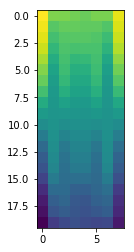

In [27]:
beta = 2.5; mu0 = 0
e_arr = np.linspace(-15,15,15000)
V_arr = np.linspace(-10,10,20)

Occ_store = Occ_V_sweep(mu0, V_arr, e_arr, n_it0 = 20, n_it = 20, beta = beta)

plt.imshow(np.real(Occ_store[:,np.arange(0,N_sites),1,np.arange(0,N_sites),1]) - np.real(Occ_store[:,np.arange(0,N_sites),0,np.arange(0,N_sites),0]))
plt.show()

#### Computing the current and other transmission-parameters for the occupations which were obtained over the voltage-range in the previous section

0
(8, 2, 8, 2)
1
(8, 2, 8, 2)
2
(8, 2, 8, 2)
3
(8, 2, 8, 2)
4
(8, 2, 8, 2)
5
(8, 2, 8, 2)
6
(8, 2, 8, 2)
7
(8, 2, 8, 2)
8
(8, 2, 8, 2)
9
(8, 2, 8, 2)
10
(8, 2, 8, 2)
11
(8, 2, 8, 2)
12
(8, 2, 8, 2)
13
(8, 2, 8, 2)
14
(8, 2, 8, 2)
15
(8, 2, 8, 2)
16
(8, 2, 8, 2)
17
(8, 2, 8, 2)
18
(8, 2, 8, 2)
19
(8, 2, 8, 2)


C:\Programs\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


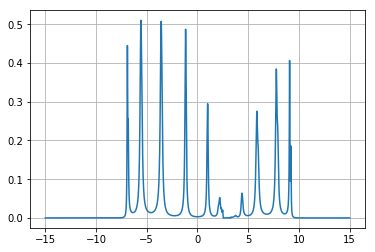

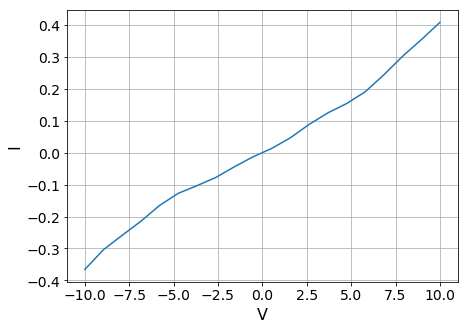

In [28]:

def IV_generate(mu0, V_arr, e_arr_p, beta, Occ_store):
    """
    Computes the currents over a leads kept at chemical potential mu0 over a bias-voltage range specified by V_arr
    from the occupation and off-site capacitive arrays n_arr_sweep_res and UC_arr_sweep_res    
    n_arr_sweep_res[i], UC_arr_sweep_res[i] correspond to the voltage V_arr[i]
    
    Input:
        mu0 : Chemical potential of the leads in case of no bias-voltage
        V_arr : 1D Array containing all bias-voltages such that for the i-th vaulue, the leads are kept at mu_L = mu0 + V_arr[i]/2 and mu_R = mu0 - V_arr[i]/2
        e_arr_p : 1D array containing all energy-values (e_arr[i] gives the i-th energy-value)
        beta : Inverse temperature
        Occ_store : (shape = [len(V_arr),N_sites,2,N_sites,2]) Array containg the occupations at the bias-voltages stored in V_arr, where Occ[Vi,i,s,i',s'] = <c^+_is c_i's'> at bias-voltage Vi
    Returns:
        I_store : 1D Array storing the total currents at bias-voltages stored in V_arr, where I_store[i] gives the total current corresponding to V_arr[i]
        Transm_tot : 1D Array storing the total transmission at the final voltage V_arr[-1], where Transm_tot[i] gives the transmission for energy e_arr_p[i]
        Spin_Pol : 1D Array  storing the spin-polarized transmission at the final voltage V_arr[-1], where Spin_Pol[i] gives the SPT for energy e_arr_p[i]
    """
    
    I_store = np.zeros([len(V_arr)], dtype = 'complex128')
    
    for j in range(0,len(V_arr)):
       # print(V_arr[j])
        FD_diff_arr = FD_dist(e_arr_p, mu0 + V_arr[j]/2, beta) - FD_dist(e_arr_p, mu0 - V_arr[j]/2, beta)
        print(j)
       # print(np.max(np.abs(FD_diff_arr)))
        Occ_j = Occ_store[j]
        
        n_arr_res_j = get_n_arr_res(Occ_j)
        UC_arr_res_j = get_UC_arr_res(Occ_j)
        
        Transm_arr_down = np.zeros(len(e_arr_p), dtype = 'complex128')
        Transm_arr_up = np.zeros(len(e_arr_p), dtype = 'complex128')
        Transm_arr_du = np.zeros(len(e_arr_p), dtype = 'complex128')
        Transm_arr_ud = np.zeros(len(e_arr_p), dtype = 'complex128')
        
        for i in range(len(e_arr_p)):
            G_ret_res = generate_GF_ret_res(e_arr_p[i], n_arr_res_j, UC_arr_res_j)#G_ret_store[i]#GF_ret(e_arr[i] + 0.0000001j,H0,Sigma_L_res + Sigma_R_res)
            G_ret = np.reshape(G_ret_res, [N_sites,2,N_sites,2])
            
            G_adv_res = np.transpose(np.conj(G_ret_res))
            G_adv = np.reshape(G_adv_res, [N_sites,2,N_sites,2])

            
            Ti_down = np.trace(np.dot(Gamma_L_res,np.dot(Spin_res_down,np.dot(G_ret_res,np.dot(Gamma_R_res,np.dot(Spin_res_down,G_adv_res))))))
            Ti_up = np.trace(np.dot(Gamma_L_res,np.dot(Spin_res_up,np.dot(G_ret_res,np.dot(Gamma_R_res,np.dot(Spin_res_up,G_adv_res))))))
            Ti_du = np.trace(np.dot(Gamma_L_res,np.dot(Spin_res_up,np.dot(G_ret_res,np.dot(Gamma_R_res,np.dot(Spin_res_down,G_adv_res))))))
            Ti_ud = np.trace(np.dot(Gamma_L_res,np.dot(Spin_res_down,np.dot(G_ret_res,np.dot(Gamma_R_res,np.dot(Spin_res_up,G_adv_res))))))
            
            Transm_arr_down[i] = Ti_down
            Transm_arr_up[i] = Ti_up
            Transm_arr_du[i] = Ti_du
            Transm_arr_ud[i] = Ti_ud

        Transm_tot = Transm_arr_up + Transm_arr_du + Transm_arr_ud + Transm_arr_down
        Spin_Pol = (Transm_arr_up + (Transm_arr_du - Transm_arr_ud) - Transm_arr_down)/Transm_tot
        I_store[j] = np.abs(e_arr_p[1] - e_arr_p[0])*np.sum(Transm_tot*FD_diff_arr)

    return I_store, Transm_tot, Spin_Pol
I_store, Transm_tot, Spin_Pol = IV_generate(mu0, V_arr,e_arr, beta, Occ_store)

plt.plot(e_arr, Transm_tot);
plt.grid();plt.show()

plt.figure(figsize = (7,5))
plt.plot(V_arr, np.real(I_store))
plt.xlabel('V', fontsize = 16);plt.ylabel('I', fontsize = 16)
plt.xticks(fontsize = 14);plt.yticks(fontsize = 14)
plt.grid();plt.show()

In [32]:
I_store2 = np.copy(I_store)

Comparing currents for different magnetizations (for determining the current-asymmetry or MR)

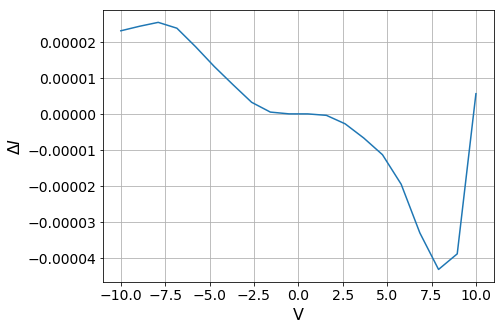

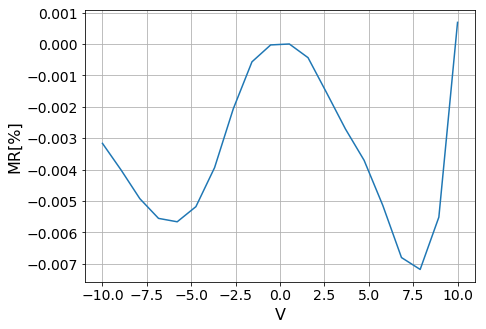

In [34]:

plt.figure(figsize = (7,5))
plt.plot(V_arr, np.real(I_store-I_store2))

plt.xlabel('V', fontsize = 16);plt.ylabel(r'$\Delta I$', fontsize = 16)
plt.xticks(fontsize = 14);plt.yticks(fontsize = 14)
plt.grid();plt.show()

plt.figure(figsize = (7,5))
plt.plot(V_arr, 100*np.real(I_store-I_store2)/np.real(I_store + I_store2))

plt.xlabel('V', fontsize = 16);plt.ylabel('MR[%]', fontsize = 16)
plt.xticks(fontsize = 14);plt.yticks(fontsize = 14)
plt.grid();plt.show()